# Descriptive statistics
NumPy arrays can be used for data analysis, using NumPy and SciPy functions and Matplotlib plots.

If we take some measure, such as height, in a large group of people, we will see a *distribution* of different values across different people. There are two numbers that specify what this distribution looks like: the *mean* and the *standard deviation*.

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Statistical distributions
Sometimes, we will have a good estimate of how some statistic, like height, varies across a large population of people. This information about the *distribution* of the statistic will let us calculate things like height *percentiles*.

In [2]:
# source: https://www.cdc.gov/nchs/data/series/sr_03/sr03-046-508.pdf
# US females aged 20 and over, 2015-2018
# standard deviation from that source looks wrong somehow; estimating a reasonable-looking one below
mf = 161.3
nf = 5510
semf = 0.19
stdf = semf * np.sqrt(nf) / 2
mm = 175.3
nm = 5092
semm = 0.19
stdm = semm * np.sqrt(nm) / 2

Text(0, 0.5, 'Probability density')

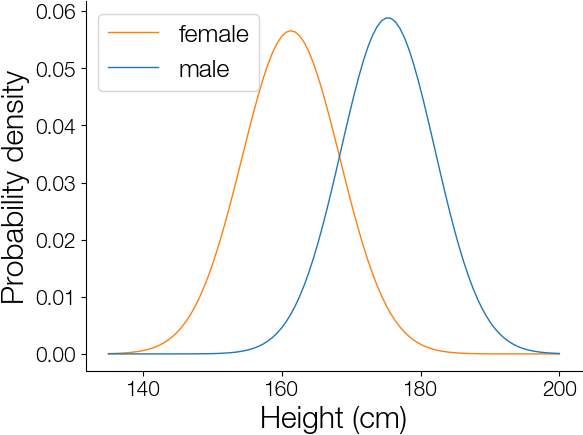

In [3]:
x = np.linspace(135, 200, 100)
pdff = stats.norm.pdf(x, loc=mf, scale=stdf)
pdfm = stats.norm.pdf(x, loc=mm, scale=stdm)
plt.plot(x, pdff, color="C1")
plt.plot(x, pdfm, color="C0")
plt.legend(["female", "male"])
plt.xlabel("Height (cm)")
plt.ylabel("Probability density")

This plot shows an estimate of how often heights (in cm) occur in people in the US.

Let's look more closely at one of the distributions. One way to think about a distribution is in terms of *percentiles*. A percentile $p$ is the point where $p$% of observations are greater.

Let's use SciPy to get an estimate of the 50% percentile of height for females. The 50% percentile is also called the *median*.

In [4]:
stats.norm.ppf(0.5, loc=mf, scale=stdf)

np.float64(161.3)

We can do the same for males.

In [5]:
stats.norm.ppf(0.5, loc=mm, scale=stdm)

np.float64(175.3)

We can look at a bunch of different percentiles to get a feel for how things vary.

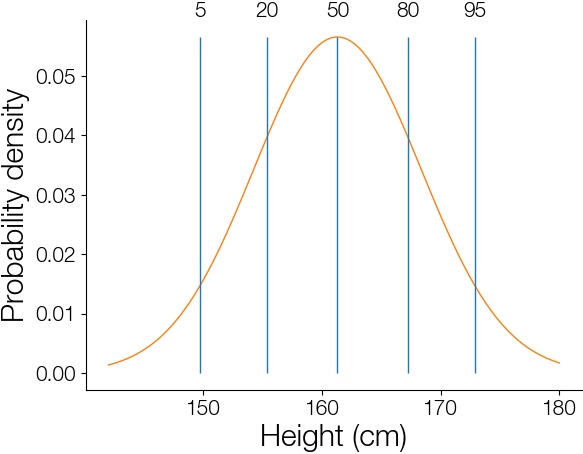

In [6]:
qs = [.05, .2, .5, .8, .95]
x = np.linspace(142, 180, 100)
pdff = stats.norm.pdf(x, loc=mf, scale=stdf)
perc = stats.norm.ppf(qs, loc=mf, scale=stdf)
plt.plot(x, pdff, color="C1")
plt.xlabel("Height (cm)")
plt.ylabel("Probability density")
plt.vlines(perc, 0, stats.norm.pdf(perc[2], loc=mf, scale=stdf))
for q, p in zip(qs, perc):
    plt.text(p, .06, f"{q * 100:.0f}", ha="center", fontsize="small")

## Random data generation
We can use various NumPy functions to generate random data. We'll use this to demonstrate descriptive statistics.

From this graph, we can see different percentiles for height. The 5th percentile is around 150 cm, or about 4'11". The 95th percentile is around 173 cm, or about 5'8". (TODO: fix these numbers)

## Sample distributions
Before, we looked at a case where we had a good model of the distribution of heights across people, based on a large number of observations. Usually, we have some small-ish number of samples and have to estimate this distribution. We can characterize the sample using what are called *descriptive statistics*.

We can use a *histogram* to see the relative frequency of different values.

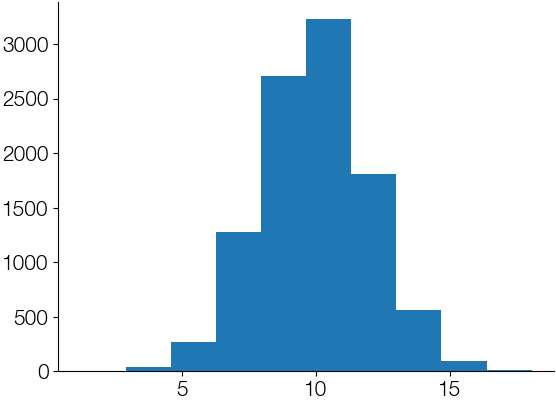

In [7]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(42)
x = rng.normal(loc=10, scale=2, size=10000)
h = plt.hist(x)

## Measures of central tendency

One simple question we can ask about a sample is what the *central tendency* of it is. We have seen the *mean* used before. It's calculated by summing up all the observations and dividing by the number of observations.

In [8]:
np.mean(x)

np.float64(9.979500249171977)

We can visualize the mean by plotting it on the histogram.

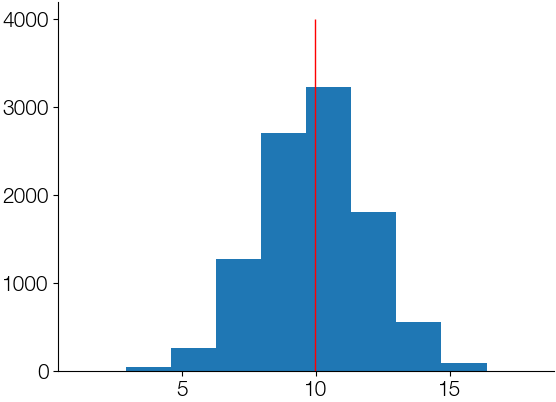

In [9]:
h = plt.hist(x)
plt.vlines(np.mean(x), 0, 4000, color="red")

## Measures of spread

The other main measure we'll use measures the *spread* of the distribution. We know the mean of our distribution is around 10, but how much does each observation deviate from that? Are we likely to see a sample of 15? 20? The standard deviation essential measures the average distance of an observation from the mean.

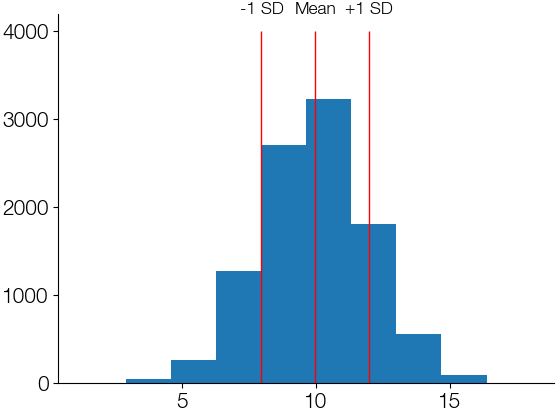

In [10]:
m = np.mean(x)
sd = np.std(x)
h = plt.hist(x)
vxs = [m - sd, m, m + sd]
vts = ["-1 SD", "Mean", "+1 SD"]
plt.vlines(vxs, 0, 4000, color="red")
for vx, vt in zip(vxs, vts):
    plt.text(vx, 4200, vt, ha="center", fontsize="x-small")

## Missing data
Sometimes, we have some observations that are *missing*. For example, say we had two different psychology tasks that study participants completed, but some participants didn't complete the second study. In that case, their accuracy on the second task would be missing. NumPy arrays have a special value for representing missing data: `NaN`, which stands for not-a-number.